<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_3_0_7_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.3_0.7'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.570064,39.438923,70.544947,35.642617,-0.498005,248.698547,248.764435,-0.065887
1,0.0,1.0,73.158728,38.889734,88.679729,94.765071,-0.386701,305.106562,305.363858,-0.257296
2,0.0,2.0,86.116456,65.559587,59.935644,37.283418,-0.055582,258.839523,258.649092,0.190431
3,0.0,3.0,86.166941,60.136859,94.509132,78.213053,0.083754,329.109739,328.841290,0.268449
4,0.0,4.0,45.015889,55.932235,56.181925,89.724362,-0.183132,256.671279,257.003089,-0.331810
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,62.608126,67.950581,51.270144,66.084262,-0.893261,257.019853,257.970931,-0.951078
59996,999.0,56.0,79.296538,47.199324,57.043559,79.247104,0.020557,272.807082,272.696977,0.110105
59997,999.0,57.0,81.469923,97.518217,67.651653,43.235331,-0.246880,299.628243,299.675710,-0.047467
59998,999.0,58.0,88.670861,62.417903,78.787581,76.055630,1.696196,317.628171,315.737600,1.890571


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    93.570064  39.438923  70.544947  35.642617 -0.498005  248.698547   
      1.0    73.158728  38.889734  88.679729  94.765071 -0.386701  305.106562   
      2.0    86.116456  65.559587  59.935644  37.283418 -0.055582  258.839523   
      3.0    86.166941  60.136859  94.509132  78.213053  0.083754  329.109739   
      4.0    45.015889  55.932235  56.181925  89.724362 -0.183132  256.671279   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   62.608126  67.950581  51.270144  66.084262 -0.893261  257.019853   
      56.0   79.296538  47.199324  57.043559  79.247104  0.020557  272.807082   
      57.0   81.469923  97.518217  67.651653  43.235331 -0.246880  299.628243   
      58.0   88.670861  62.417903  78.787581  76.055630  1.696196  317.628171   
      59.0   23.300485  99.828189  83.664342  90.488160 -0.383944  306.897230   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    248.764435 -0.065887  
      1.0    305.363858 -0.257296  
      2.0    258.649092  0.190431  
      3.0    328.841290  0.268449  
      4.0    257.003089 -0.331810  
...                 ...       ...  
999.0 55.0   257.970931 -0.951078  
      56.0   272.696977  0.110105  
      57.0   299.675710 -0.047467  
      58.0   315.737600  1.890571  
      59.0   307.846623 -0.949392  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    93.570064  39.438923  70.544947  35.642617 -0.498005  248.698547   
      1.0    73.158728  38.889734  88.679729  94.765071 -0.386701  305.106562   
      2.0    86.116456  65.559587  59.935644  37.283418 -0.055582  258.839523   
      3.0    86.166941  60.136859  94.509132  78.213053  0.083754  329.109739   
      4.0    45.015889  55.932235  56.181925  89.724362 -0.183132  256.671279   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   62.608126  67.950581  51.270144  66.084262 -0.893261  257.019853   
      56.0   79.296538  47.199324  57.043559  79.247104  0.020557  272.807082   
      57.0   81.469923  97.518217  67.651653  43.235331 -0.246880  299.628243   
      58.0   88.670861  62.417903  78.787581  76.055630  1.696196  317.628171   
      59.0   23.300485  99.828189  83.664342  90.488160 -0.383944  306.897230   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    248.764435 -0.065887  
      1.0    305.363858 -0.257296  
      2.0    258.649092  0.190431  
      3.0    328.841290  0.268449  
      4.0    257.003089 -0.331810  
...                 ...       ...  
999.0 55.0   257.970931 -0.951078  
      56.0   272.696977  0.110105  
      57.0   299.675710 -0.047467  
      58.0   315.737600  1.890571  
      59.0   307.846623 -0.949392  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.570064,39.438923,70.544947,35.642617,-0.498005,248.698547,248.764435,-0.065887
1,0.0,1.0,73.158728,38.889734,88.679729,94.765071,-0.386701,305.106562,305.363858,-0.257296
2,0.0,2.0,86.116456,65.559587,59.935644,37.283418,-0.055582,258.839523,258.649092,0.190431
3,0.0,3.0,86.166941,60.136859,94.509132,78.213053,0.083754,329.109739,328.841290,0.268449
4,0.0,4.0,45.015889,55.932235,56.181925,89.724362,-0.183132,256.671279,257.003089,-0.331810
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,62.608126,67.950581,51.270144,66.084262,-0.893261,257.019853,257.970931,-0.951078
59996,999.0,56.0,79.296538,47.199324,57.043559,79.247104,0.020557,272.807082,272.696977,0.110105
59997,999.0,57.0,81.469923,97.518217,67.651653,43.235331,-0.246880,299.628243,299.675710,-0.047467
59998,999.0,58.0,88.670861,62.417903,78.787581,76.055630,1.696196,317.628171,315.737600,1.890571


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    93.570064  39.438923  70.544947  35.642617 -0.498005  248.698547   
      1.0    73.158728  38.889734  88.679729  94.765071 -0.386701  305.106562   
      2.0    86.116456  65.559587  59.935644  37.283418 -0.055582  258.839523   
      3.0    86.166941  60.136859  94.509132  78.213053  0.083754  329.109739   
      4.0    45.015889  55.932235  56.181925  89.724362 -0.183132  256.671279   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   62.608126  67.950581  51.270144  66.084262 -0.893261  257.019853   
      56.0   79.296538  47.199324  57.043559  79.247104  0.020557  272.807082   
      57.0   81.469923  97.518217  67.651653  43.235331 -0.246880  299.628243   
      58.0   88.670861  62.417903  78.787581  76.055630  1.696196  317.628171   
      59.0   23.300485  99.828189  83.664342  90.488160 -0.383944  306.897230   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    248.764435 -0.065887  
      1.0    305.363858 -0.257296  
      2.0    258.649092  0.190431  
      3.0    328.841290  0.268449  
      4.0    257.003089 -0.331810  
...                 ...       ...  
999.0 55.0   257.970931 -0.951078  
      56.0   272.696977  0.110105  
      57.0   299.675710 -0.047467  
      58.0   315.737600  1.890571  
      59.0   307.846623 -0.949392  

[60000 rows x 8 columns]

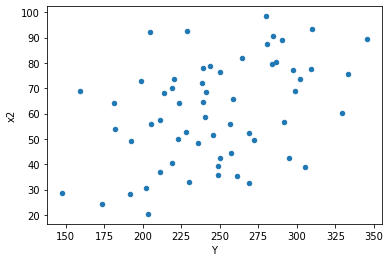

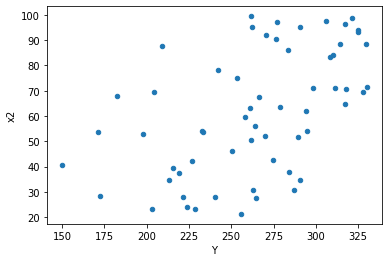

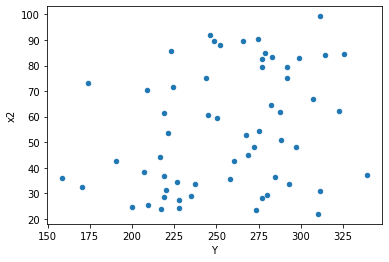

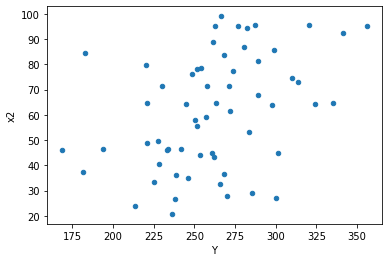

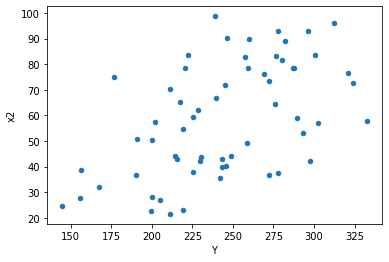

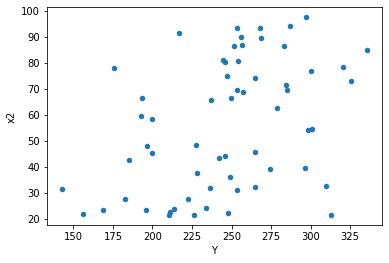

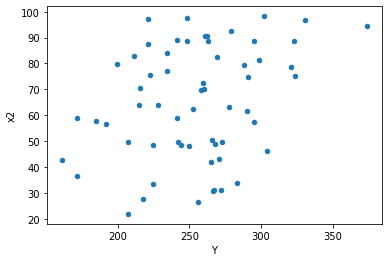

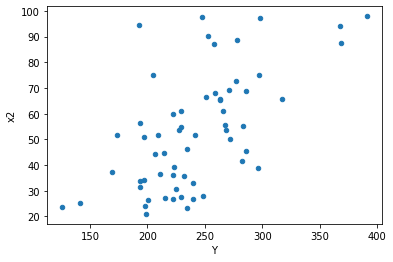

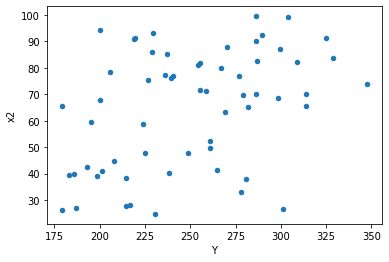

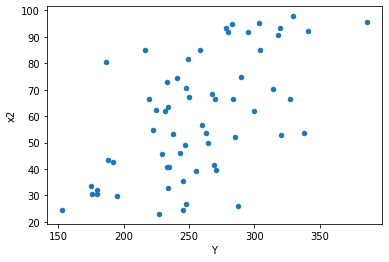

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,21.0,31.0,7.585961015972658,17.00332032808491,0.3612362388558409,0.5484942041317713,1.5183808963049794,0.28427679933331484,0.8578616003333426,0.14213839966665742,Reject001=1 : Homoscedasticity
6.0,29.0,23.0,11.578430341163333,13.096180555627551,0.3992562186608046,0.5693991545925022,1.4261497454000729,0.38603349073855187,0.8069832546307241,0.19301674536927593,Reject001=1 : Homoscedasticity
7.0,34.0,18.0,12.441748327737049,8.135502916596375,0.3659337743452073,0.45197238425535413,1.2351207129325577,0.6463801517772492,0.6768099241113754,0.3231900758886246,Reject001=1 : Homoscedasticity
8.0,26.0,26.0,6.606627239071823,9.181602516315273,0.25410104765660857,0.3531385583198182,1.3897564042988468,0.40696720522361063,0.7965163973881947,0.20348360261180531,Reject001=1 : Homoscedasticity
9.0,31.0,21.0,13.774465053237813,10.84882264435948,0.4443375823625101,0.5166106021123562,1.1626534027699746,0.7295928386930193,0.6352035806534904,0.36479641934650964,Reject001=1 : Homoscedasticity
17.0,24.0,28.0,9.350105905062097,19.999706886159384,0.38958774604425406,0.7142752459342637,1.833413019754291,0.1244051292283126,0.9377974353858437,0.0622025646141563,Reject001=1 : Homoscedasticity
18.0,23.0,29.0,7.589380355480211,13.196265555361913,0.3299730589339222,0.45504363984006596,1.379032704397814,0.409597926838154,0.795201036580923,0.204798963419077,Reject001=1 : Homoscedasticity
19.0,23.0,29.0,7.659314181055959,15.637571195918376,0.33301366004591126,0.5392265929627026,1.619232655166042,0.21889203812561675,0.8905539809371916,0.10944601906280838,Reject001=1 : Homoscedasticity
21.0,32.0,20.0,14.78488576707893,14.535305823078724,0.46202768022121654,0.7267652911539362,1.5729908017761287,0.2898705115462421,0.855064744226879,0.14493525577312105,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,31.0,21.0,12.757216594211597,8.692118028206046,0.41152311594230956,0.413910382295526,1.0058010504409942,0.9908750767235472,Reject001=1 : Homoscedasticity
1.0,15.0,37.0,10.858997881533108,19.286353326310522,0.7239331921022072,0.5212527926029871,0.7200288621790323,0.5020596910152645,Reject001=1 : Homoscedasticity
2.0,24.0,28.0,13.582067274224482,15.348389025080216,0.5659194697593534,0.548156750895722,0.9686126387007243,0.9441063761486008,Reject001=1 : Homoscedasticity
3.0,28.0,24.0,14.211252991149156,11.025641307623662,0.5075447496838984,0.45940172115098593,0.9051452535704562,0.7938518213681863,Reject001=1 : Homoscedasticity
4.0,21.0,31.0,7.585961015972658,17.00332032808491,0.3612362388558409,0.5484942041317713,1.5183808963049794,0.28427679933331484,Reject001=1 : Homoscedasticity
5.0,33.0,19.0,22.17780884758226,5.876837737704549,0.6720548135630988,0.309307249352871,0.4602411040149932,0.049179559560865116,Reject001=1 : Homoscedasticity
6.0,29.0,23.0,11.578430341163333,13.096180555627551,0.3992562186608046,0.5693991545925022,1.4261497454000729,0.38603349073855187,Reject001=1 : Homoscedasticity
7.0,34.0,18.0,12.441748327737049,8.135502916596375,0.3659337743452073,0.45197238425535413,1.2351207129325577,0.6463801517772492,Reject001=1 : Homoscedasticity
8.0,26.0,26.0,6.606627239071823,9.181602516315273,0.25410104765660857,0.3531385583198182,1.3897564042988468,0.40696720522361063,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      980
Reject001=0 : Heteroscedasticity     20
Name: Result_test, dtype: int64